<a href="https://colab.research.google.com/github/hakmin1015/PowerSystemEconomics/blob/main/Data_Analysis/Exogeneous_Variable_Analysis/solar_power_24times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시간에 따른 월별 일사량과 전력수요의 상관계수 분석

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/LoadForecasting/solar24hours


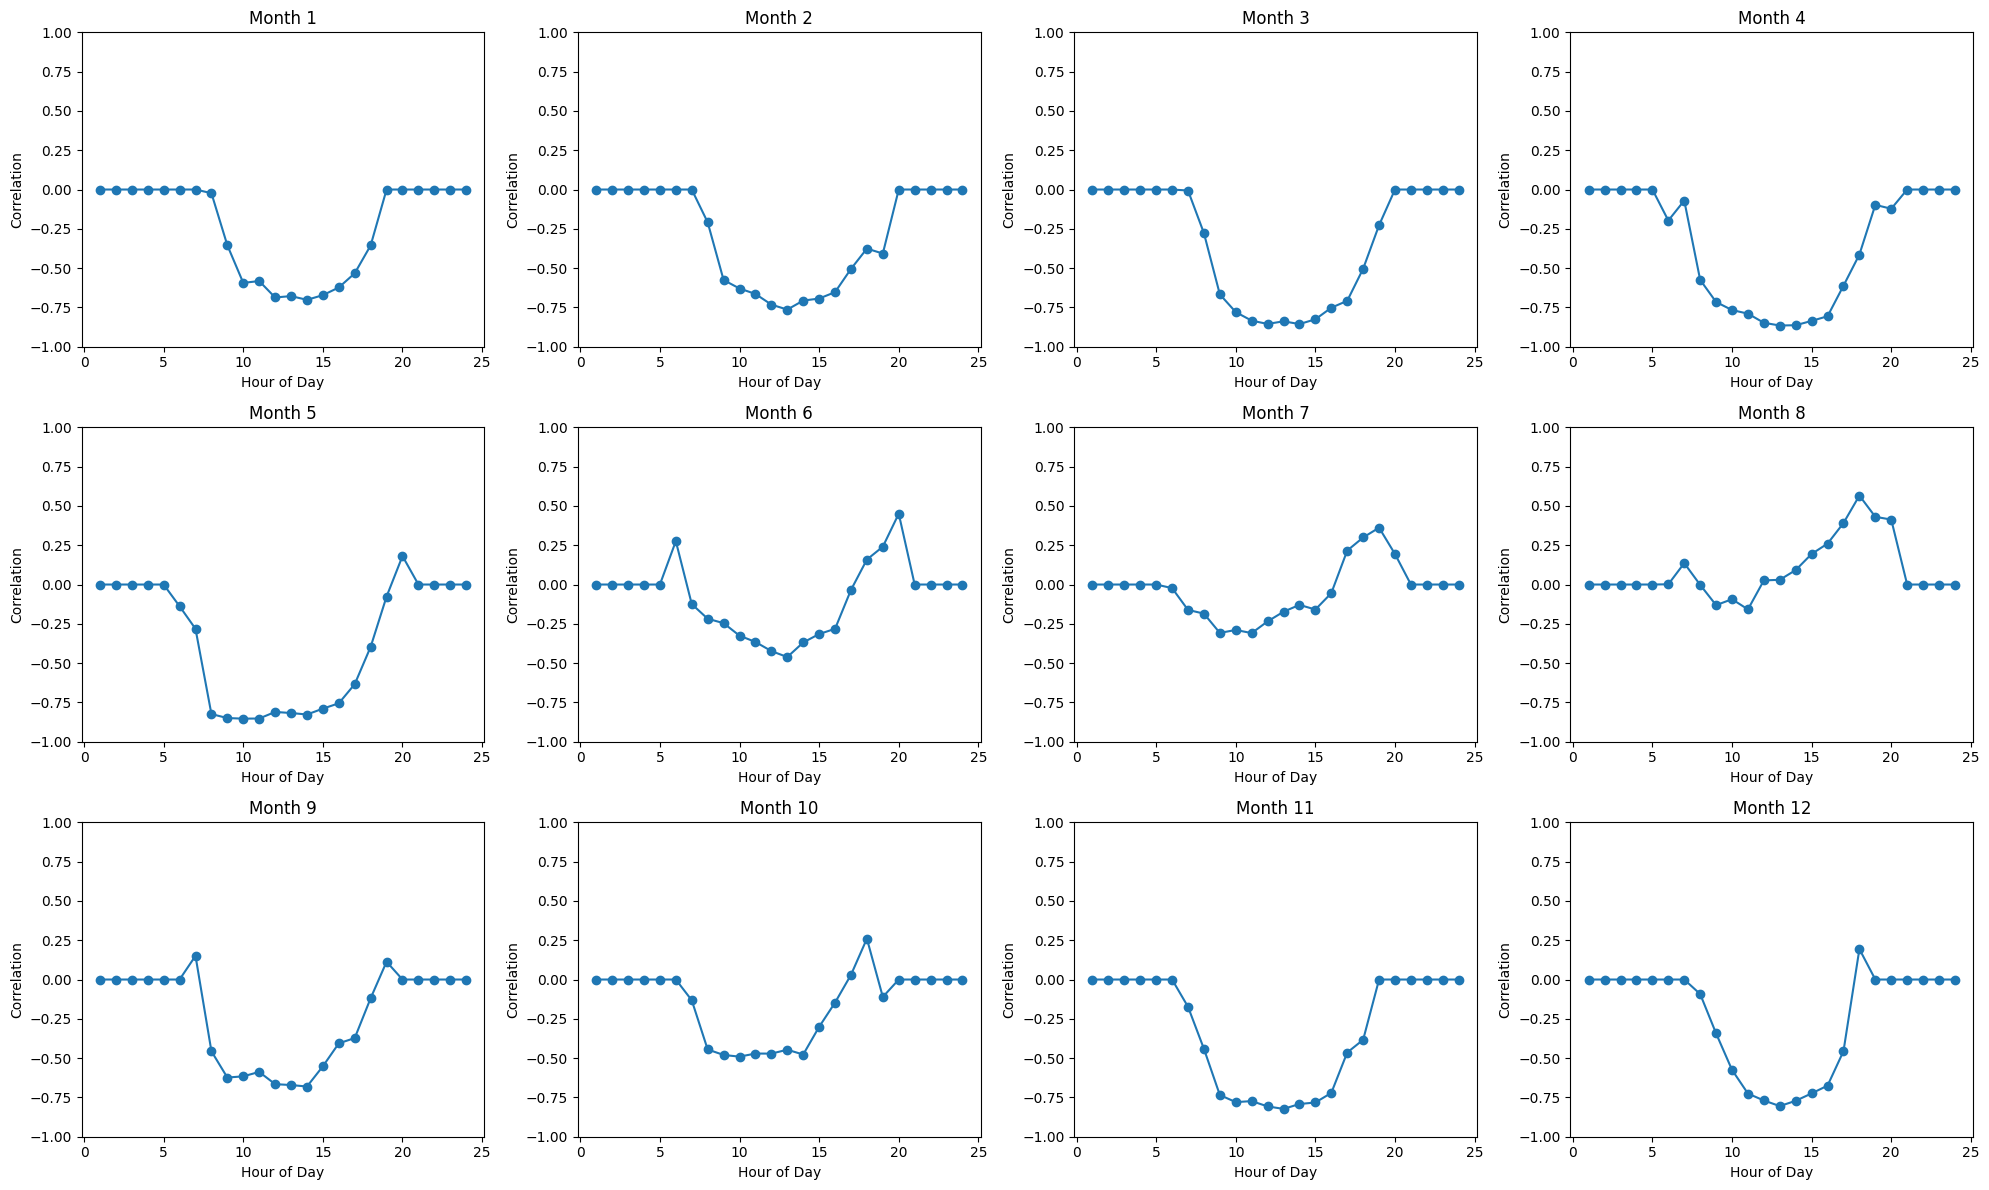

2차원 배열 (12x24)의 상관계수 값:
[[ 0.          0.          0.          0.          0.          0.
   0.         -0.02314404 -0.35465876 -0.59391847 -0.5820957  -0.68674443
  -0.67792464 -0.70168847 -0.67196219 -0.62302017 -0.53283938 -0.35559542
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.20851648 -0.57559177 -0.62965378 -0.66422338 -0.73206785
  -0.76383037 -0.70653794 -0.69351995 -0.65278643 -0.50494973 -0.37579848
  -0.40728428  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.00629303 -0.27727928 -0.66708491 -0.77976077 -0.83431735 -0.85496382
  -0.83840388 -0.85585947 -0.82547329 -0.75190276 -0.70807759 -0.5039112
  -0.2269547   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.19721521
  -0.07023214 -0.57483615 -0.7154863

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/LoadForecasting/solar24hours/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 엑셀 파일에서 데이터를 읽어옴
solar = pd.read_excel('solar_24times.xlsx')
power = pd.read_excel('power_24times.xlsx')

# 2022년 이전의 데이터 추출
solars = solar[solar['date'].dt.year <= 2022]
powers = power[power['date'].dt.year <= 2022]

# 월별로 데이터 묶기
solar_monthly = solars.groupby(solars['date'].dt.month)
power_monthly = powers.groupby(powers['date'].dt.month)

# 12개의 월별 DataFrame으로 분리
solar_monthly_data = [group for _, group in solar_monthly]
power_monthly_data = [group for _, group in power_monthly]

# 12x24 2차원 배열 초기화 (12개월 x 24시간)
corr_result = np.zeros((12, 24))

# 그래프 설정
plt.figure(figsize=(20, 12))

# 월별로 상관관계 분석
for i in range(12):
    solar_data = solar_monthly_data[i]
    power_data = power_monthly_data[i]

    correlations = []

    for j in range(24):
        # NaN을 0으로 대체
        solar_value = solar_data.iloc[:, j+1].fillna(0)
        power_value = power_data.iloc[:, j+1].fillna(0)

        # 상관관계 계산 (pandas를 사용하여 NaN을 무시하고 계산)
        corr = solar_value.corr(power_value)

        # NaN이 계산되는 경우 0으로 설정
        if np.isnan(corr):
            corr = 0

        correlations.append(corr)

        # 2차원 배열에 상관관계 값 저장
        corr_result[i, j] = corr

    # 시간대별 상관관계 그래프 그리기
    plt.subplot(3, 4, i+1)  # 3x4 레이아웃의 i+1번째 subplot
    plt.plot(range(1, 25), correlations, marker='o', linestyle='-')
    plt.title(f'Month {i+1}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Correlation')
    plt.ylim(-1, 1)  # 상관계수 범위 (-1, 1)

# 그래프 간격 조정
plt.tight_layout()
plt.show()

# 결과 출력
print("2차원 배열 (12x24)의 상관계수 값:")
print(corr_result)

for i in range(12):
    print(f"Month {i+1}")
    # Construct a string for all 24 correlation values for the month
    corr_values = " ".join(f"{corr_result[i, j]:.6f}" for j in range(24))
    print(corr_values)